In [5]:
### MF703 project Ryan Holzschuh

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math

In [6]:
### Election Day Formula
def election_day(year):
    date = pd.Timestamp(year=year, month=11, day=1)
    return date + pd.offsets.Week(weekday=1)

In [7]:
### Time Interval
num = int((2020-1992) / 4 + 1)
election_days = {1992 + 4 * i : election_day(1992 + 4 * i) for i in range(num)}
election_days.items()

ran = list(range(1992, 2021, 4))

In [8]:
### Save the data
list_of_etfs = ['SPY', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
data_full = []
returns = ['SPY', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
for index in range(len(list_of_etfs)):
    ticker = list_of_etfs[index]

    data_partial = []
    for i, j in election_days.items():
        data = yf.download(ticker, start=(j - pd.DateOffset(months=6)), end=(j + pd.DateOffset(days=14)))['Adj Close']
        data_partial.append(data)
    data_full.append(data_partial)
    

    returns[index] = [data.pct_change().dropna() for data in data_full[index]]


### general

days_range = np.arange((-21) * 6, 22)

colors = [
    "#2196F3",  # Blue
    "#00FF00",  # Lime Green
    "#000000",  # Black
    "#FF5733",  # Orange-Red
    "#9C27B0",  # Purple
    "#FFC300",  # Yellow
    "#3F51B5",  # Indigo
    "#E91E63",  # Pink
    "#795548",  # Brown
    "#4CAF50",  # Green
    "#FFEB3B",  # Bright Yellow
    
]

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPY']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 1992-05-03 00:00:00 -> 1992-11-17 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 704865600, endDate = 721976400")')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['XLB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 1992-05-03 00:00:00 -> 1992-11-17 00

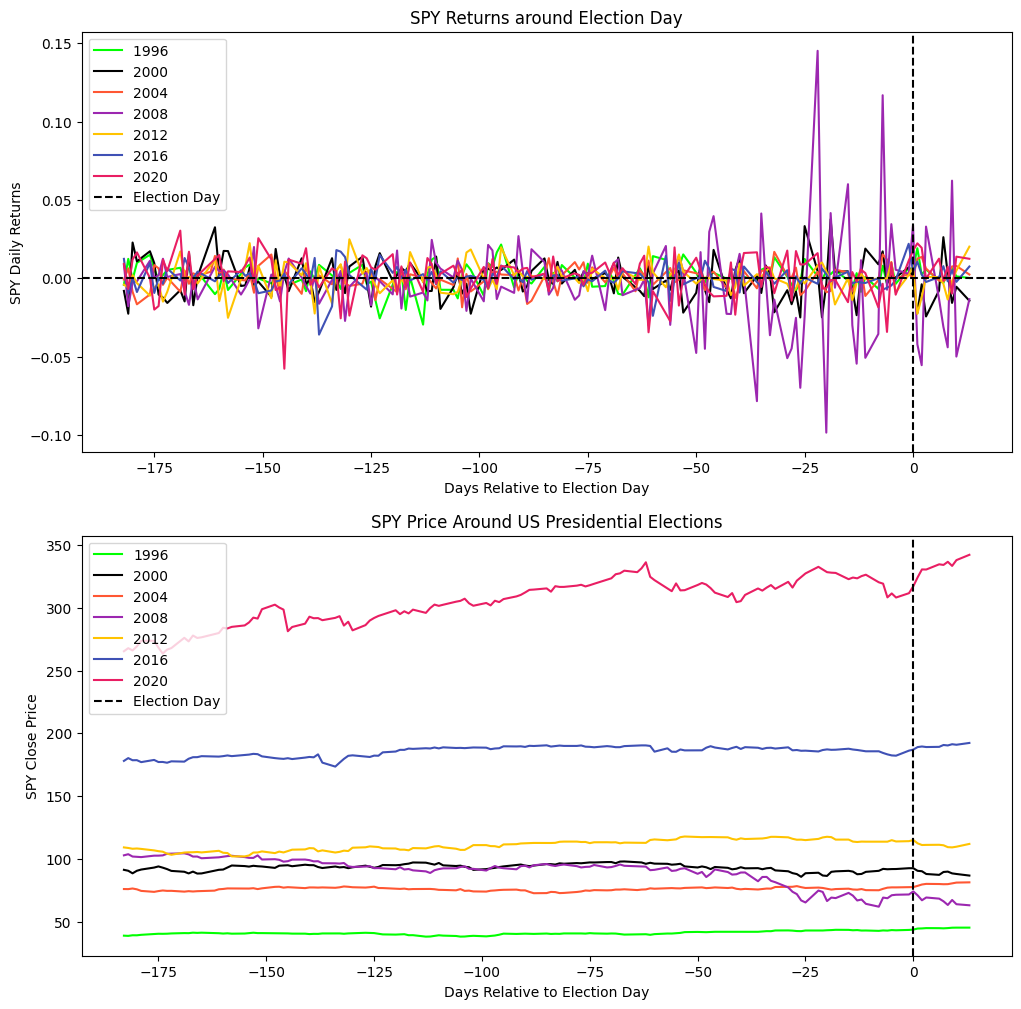

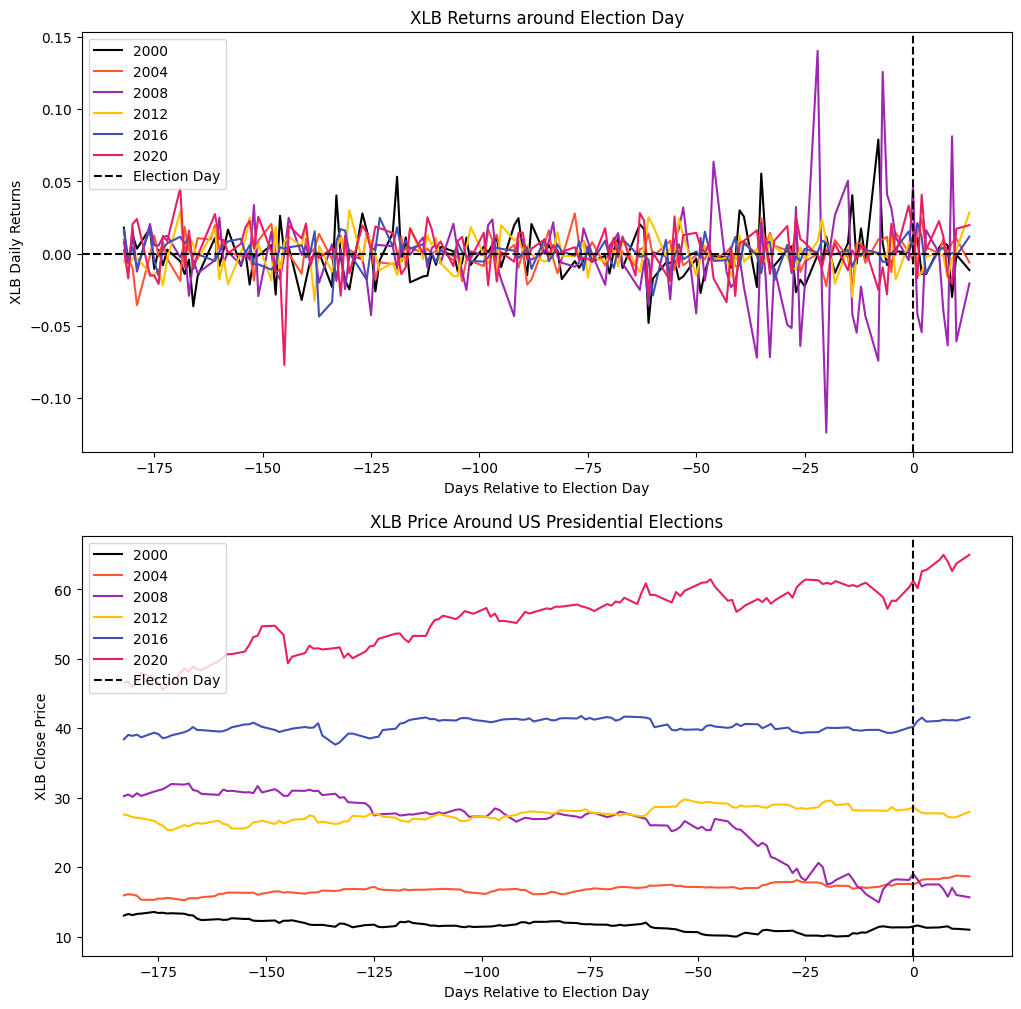

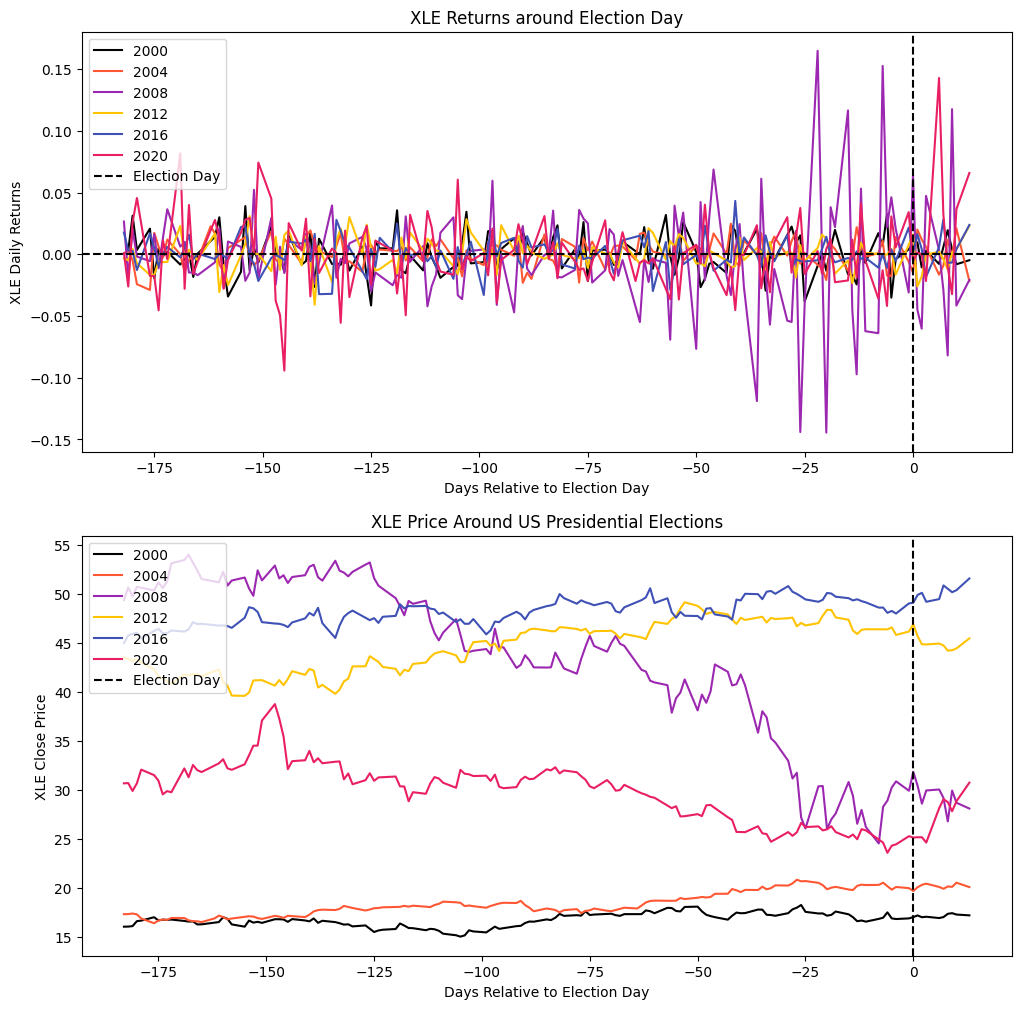

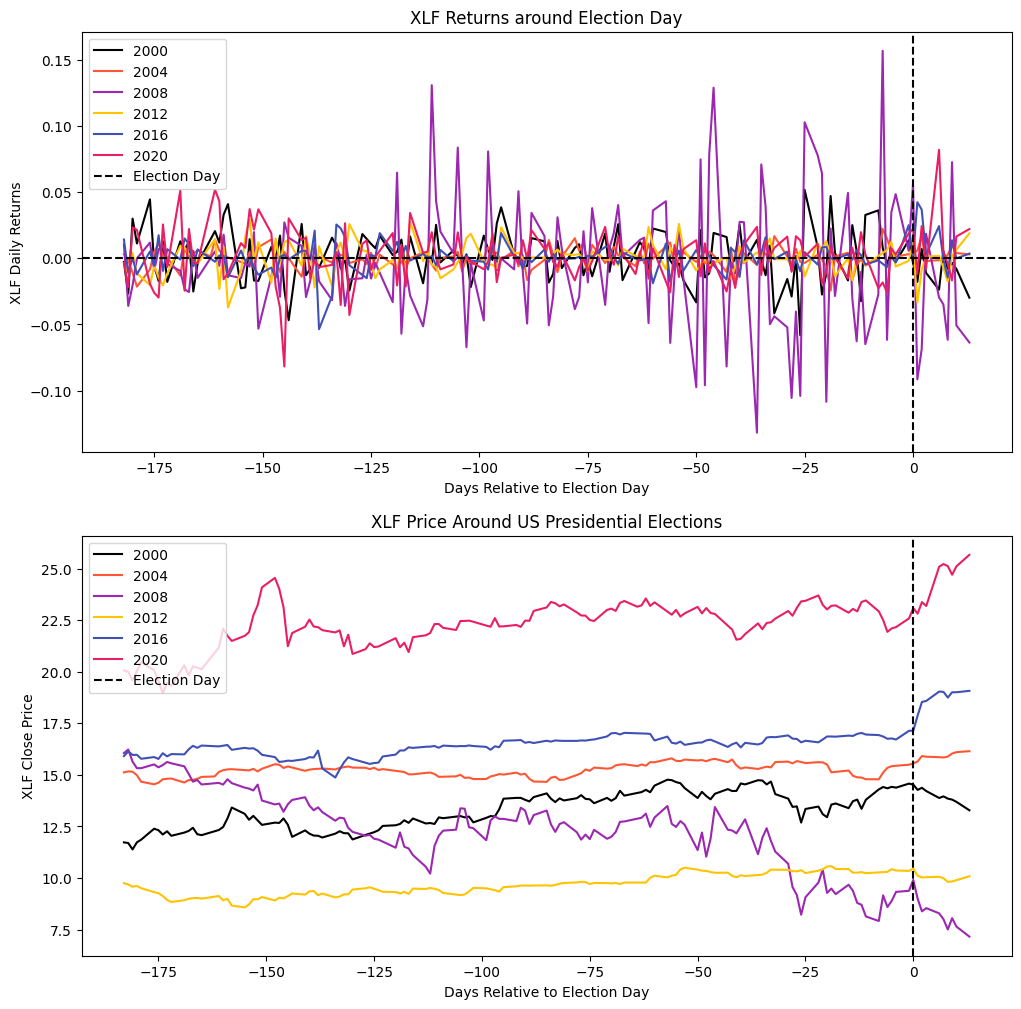

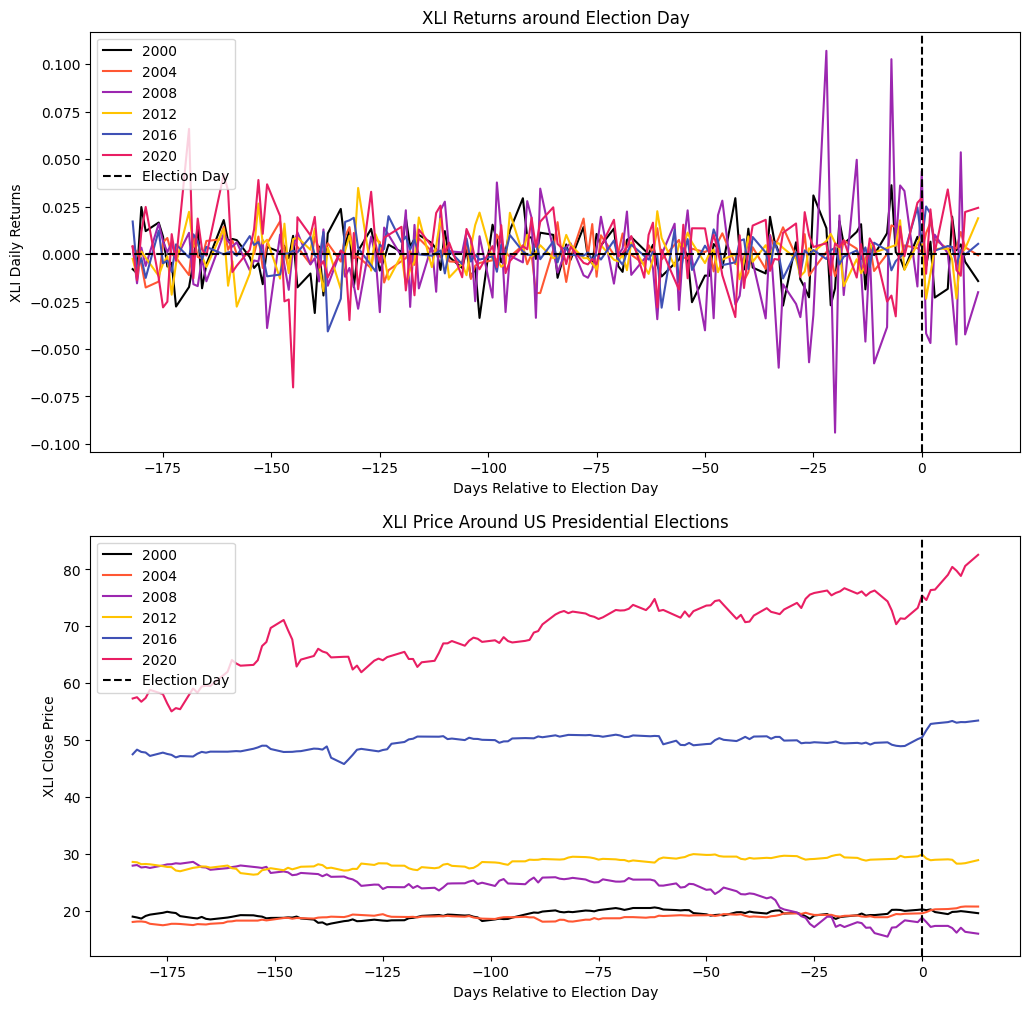

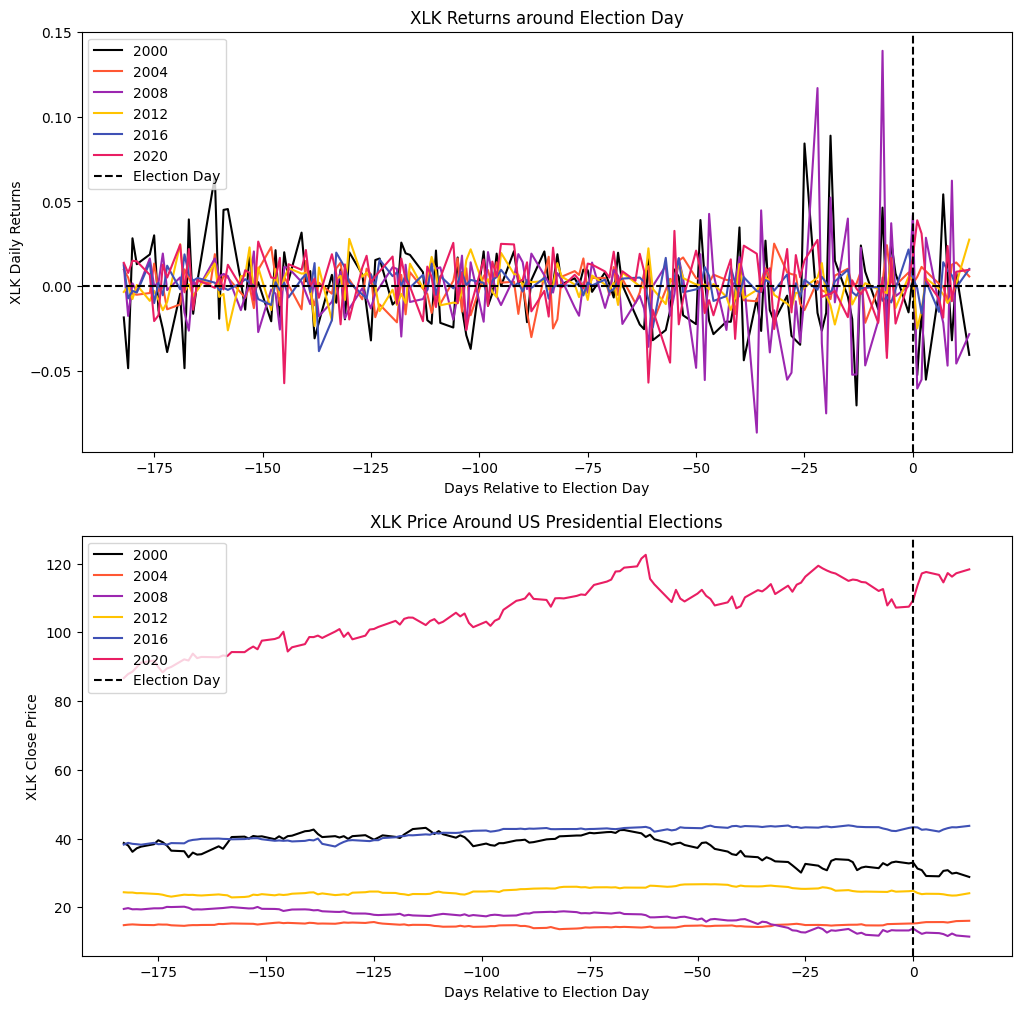

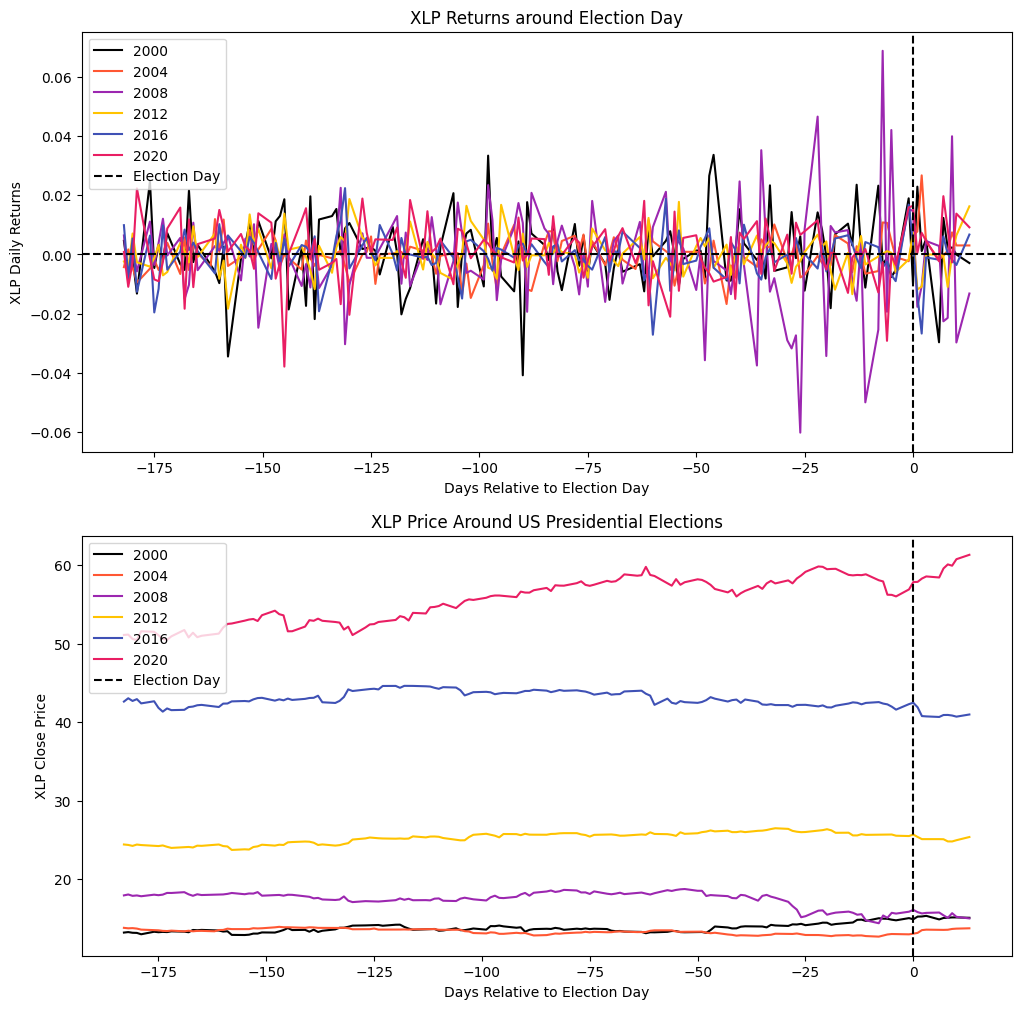

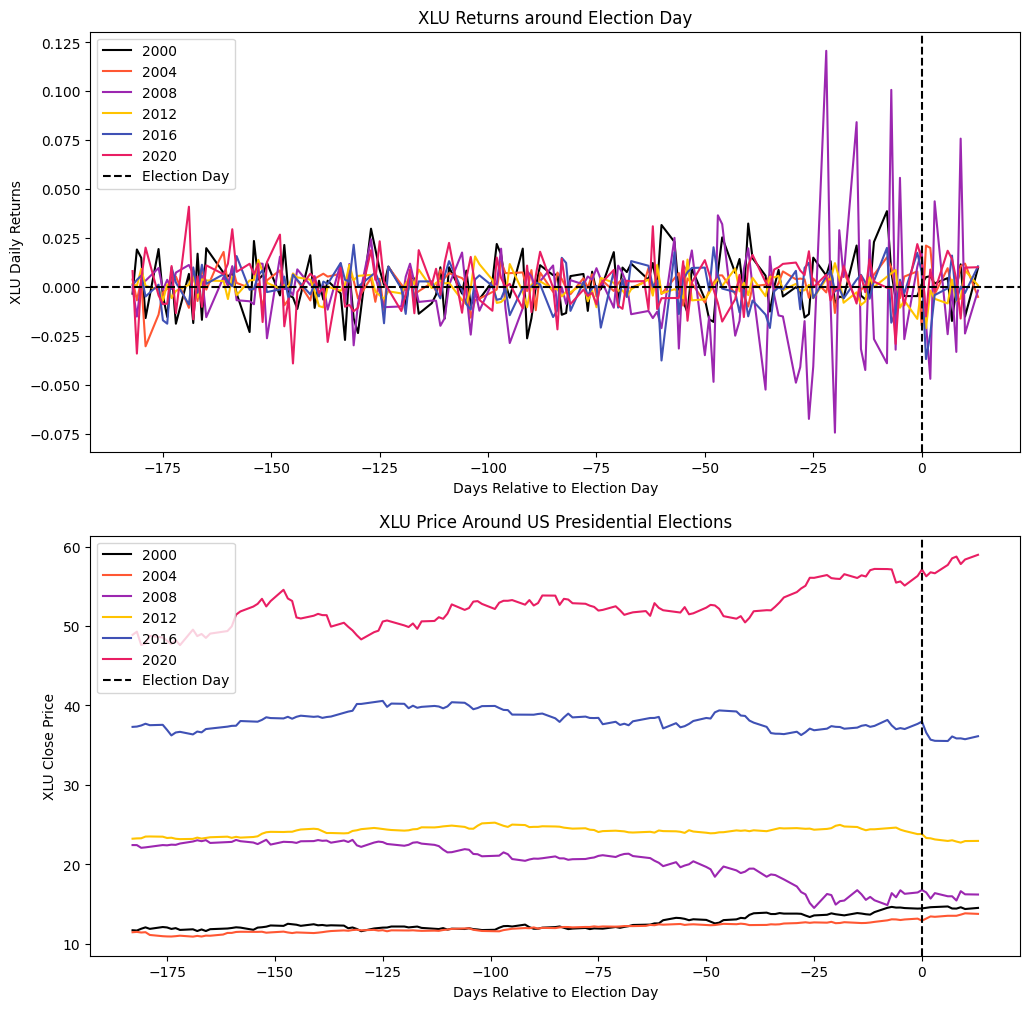

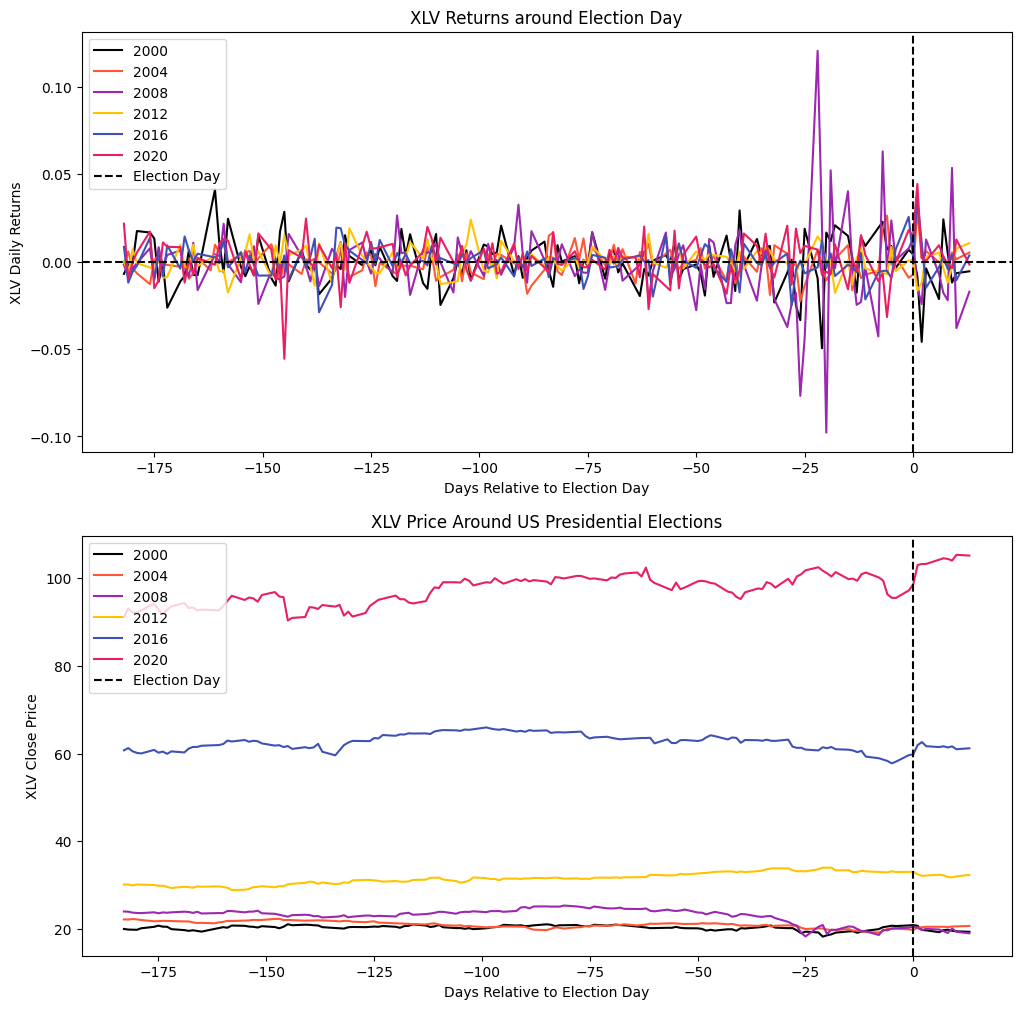

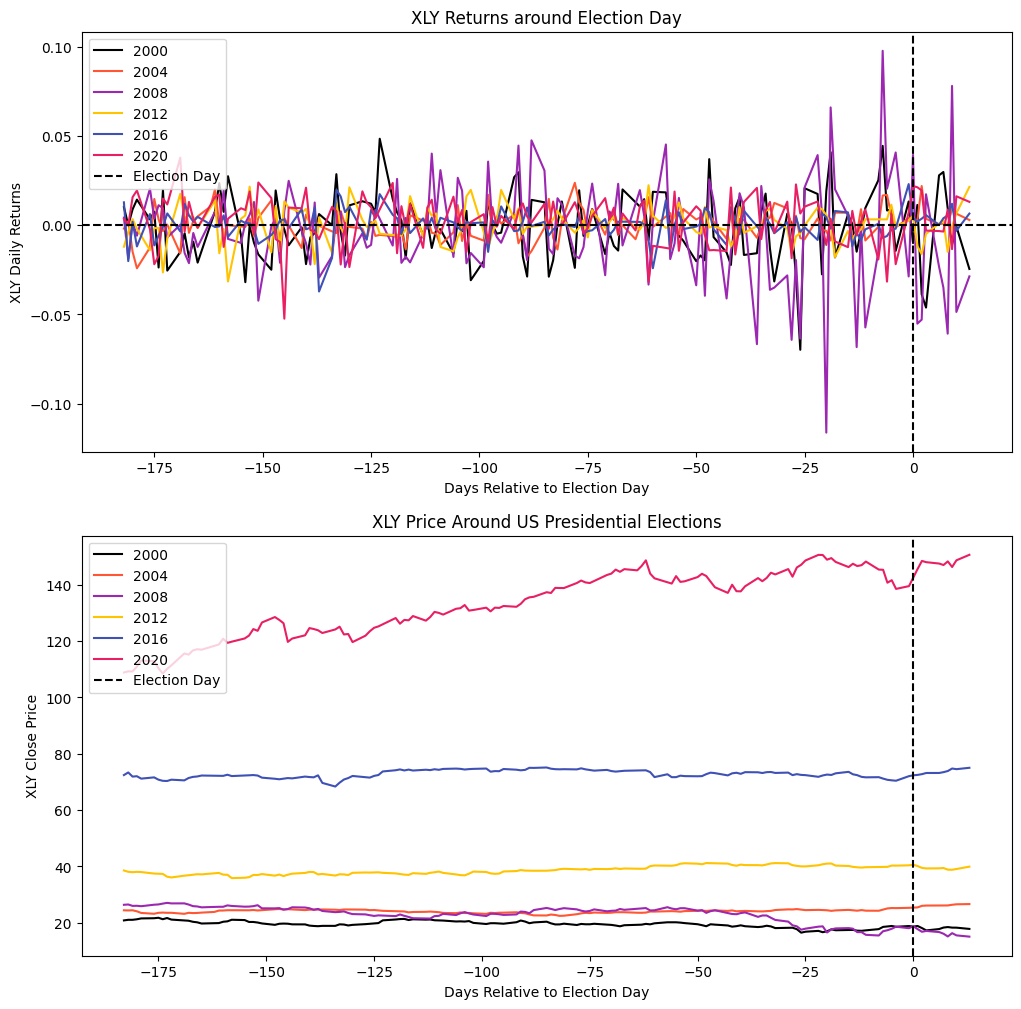

In [9]:
### Plot Creation
for j in range(len(list_of_etfs)):
    ticker = list_of_etfs[j]
    plt.figure(figsize=(12, 12))

    ### Plot Returns
    plt.subplot(2,1,1)
    for i, data in enumerate(returns[j]):
        if not data.empty:
            relative_days = (data.index - data.index[-10]).days
            plt.plot(relative_days, data.values, label=f"{list(election_days.keys())[i]} ", color = colors[i])

    plt.xlabel("Days Relative to Election Day")
    plt.ylabel(ticker + " Daily Returns")
    plt.title(ticker + " Returns around Election Day")
    plt.axvline(0, color='black', linestyle='--', label="Election Day")  # Mark the election day
    plt.axhline(0, color='black', linestyle='--')
    plt.legend(loc = 'upper left')

    ### Plot Price
    plt.subplot(2,1,2)
    for i, data in enumerate(data_full[j]):
        if not data.empty:
            relative_days = (data.index - data.index[-10]).days
            plt.plot(relative_days, data.values, label=f"{list(election_days.keys())[i]}", color = colors[i])

    plt.xlabel("Days Relative to Election Day")
    plt.ylabel(ticker + " Close Price")
    plt.title(ticker + " Price Around US Presidential Elections")
    plt.axvline(0, color='black', linestyle='--', label="Election Day")  # Mark the election day
    plt.legend(loc = 'upper left')
    plt.show()